## Binary classification using logistic Regression

We will first look at binary classification. We have $n$ features that we use to predict a binary outcome (either $0$ or $1$). We have $m$ samples of training data: $(\mathbf{x}_i, y_i)$, where $\mathbf{x}_i \in \mathbb{R}^{n+1}$ is a row vector with our features and $1$ as its first component (this will be explained later), and $y_i \in \{0,1\}$ is our binary outcome.

Define $$\sigma(x) = \frac{1}{1+e^{-x}}.$$ Then we take $\sigma(\mathbf{x} \theta^T )$ to be the probability that we classify as 1 (we take $\theta$ as a row vector too; $\theta = (\theta_0, \theta_1, \dots \theta_n)$).

The negative log-likelihood cost function is $$J(\theta_0, \dots, \theta_n) = -\frac{1}{m}\sum_{i=1}^{m}{ \left( y_i \log(\sigma(\mathbf{x}_i \theta^T )) + (1-y_i)\log(1-\sigma(\mathbf{x}_i \theta^T)) \right)}$$

We have that $$\frac{\partial{J}}{\partial{\theta_k}} = \frac{1}{m}\sum_{i}{[\mathbf{x}_i]_k (\sigma(\mathbf{x}_i \theta^T) - y_i)} .$$
Hence, $$\nabla_{\theta}{J} = \frac{1}{m}\mathbf{X}^T (\sigma(\mathbf{X} \theta^T) - \mathbf{y}),$$
where
    $$\mathbf{X}^T = \begin{bmatrix} 
                        \vert & \vert & \dots & \vert \\
                        \mathbf{x}_1 & \mathbf{x}_2 & \dots & \mathbf{x}_m \\
                        \vert & \vert & \dots & \vert \\
                   \end{bmatrix},$$

and $$\nabla_{\theta}{J} = \left(
                                \frac{\partial J}{\partial \theta_0},
                                \frac{\partial J}{\partial \theta_1},
                                \dots
                                \frac{\partial J}{\partial \theta_n} \right).$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Logistic_Regression(object):
    def __init__(self, X, y, learning_rate, iterations):
        self.X=X
        self.y=y
        self.lr = learning_rate
        self.it = iterations
        self.theta = [] # parameters
        self.cost = []
    
    # appends 1 to start of each input vector to make dot product cleaner
    
    def append_one(self):
        self.X = np.insert(self.X, 0, 1.0, axis=1)
        
    def sigmoid(self, z):
        return (1/(1+np.exp(-z)))
    def loss(self, y, h):
        return ((-y*np.log(h)) - ((1-y)*np.log(1-h))).mean()
    
    def learn(self):
        
        self.theta = np.zeros(self.X.shape[1])
        
        for i in range(self.it):
        
            z = self.X @ self.theta.T
            h = self.sigmoid(z)
            dJ = (self.X.T @ (h - self.y))*(1/self.y.size)
            self.theta -= self.lr*dJ 
            
            self.cost.append(self.loss(self.y, h))
    
        # just applying the above formulae
        
        return self.theta, self.cost
    
    def classify(self, x):
        
        x = np.insert(x, 0, 1.0, axis=0)
        
        print("probability: " + str(self.sigmoid(self.theta @ x.T)))
        
        # note that sigmoid(x) >= 1/2 iff x >= 0, we classify as 1 if prob(y=1|x) = sigmoid(x) >= 1/2
        
        if (self.theta @ x.T) >= 0:
            return 1
        else:
            return 0

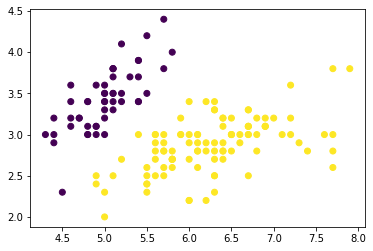

In [3]:
# EXAMPLE

import sklearn.datasets

iris = sklearn.datasets.load_iris()
X = iris.data[:, :2]
Y = (iris.target != 0) * 1

plt.scatter(X[:,0], X[:,1], c=Y);

In [4]:
log_reg = Logistic_Regression(X, Y, 0.01, 1000000)
log_reg.append_one()
output = log_reg.learn()

theta = output[0]
cost = output[1]

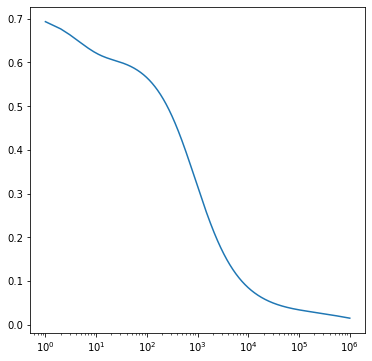

In [5]:
fig, ax = plt.subplots(figsize=(6,6))

iterations = np.arange(1, 1000001, 1)
ax.set_xscale("log")
ax.plot(iterations, cost)

# plots the cost after each iteration

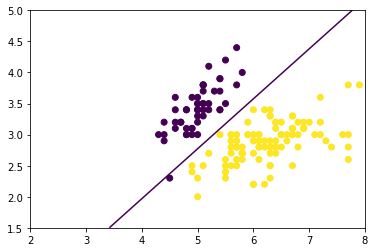

In [6]:
x = np.linspace(2, 8, 700)
y = np.linspace(1.5, 5, 700)
[a, b] = np.meshgrid(x, y)

def t(x_1, x_2):
    return theta[0] + theta[1]*x_1 + theta[2]*x_2

z = t(a, b)
plt.figure()
plt.contour(a, b, z, [0])
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show();

# shows the separation boundary